<a href="https://colab.research.google.com/github/Caio-Vinicius-CA/Violencia-Urbana/blob/main/Violencia_Urbana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Book1.xlsx to Book1 (1).xlsx


In [ ]:
df = pd.read_excel("Book1.xlsx")
df.head()

,MUNICIPIO,REGIAO_GEOGRAFICA,SEXO,NATUREZA JURIDICA,DATA,ANO,IDADE,TOTAL DE VITIMAS
0,BEZERROS,AGRESTE,MASCULINO,HOMICIDIO,2004-01-01,2004,22.0,1
1,BEZERROS,AGRESTE,MASCULINO,HOMICIDIO,2004-01-01,2004,NaN,1
2,BUENOS AIRES,ZONA DA MATA,MASCULINO,HOMICIDIO,2004-01-01,2004,43.0,1
3,CAMARAGIBE,REGIÃO METROPOLITANA,FEMININO,HOMICIDIO,2004-01-01,2004,54.0,1
4,CARUARU,AGRESTE,MASCULINO,HOMICIDIO,2004-01-01,2004,59.0,1


In [ ]:
df = df.dropna(subset=['MUNICIPIO', 'SEXO', 'DATA', 'TOTAL DE VITIMAS'])

# Converte TOTAL_VITIMAS para inteiro
df['TOTAL DE VITIMAS'] = pd.to_numeric(df['TOTAL DE VITIMAS'], errors='coerce').fillna(0).astype(int)

# Converte DATA para datetime
df['DATA'] = pd.to_datetime(df['DATA'], errors='coerce')

# Corrige IDADE (se houver erros ou dados ausentes)
df['IDADE'] = pd.to_numeric(df['IDADE'], errors='coerce').fillna(-1).astype(int)

In [ ]:
df.head()

,MUNICIPIO,REGIAO_GEOGRAFICA,SEXO,NATUREZA JURIDICA,DATA,ANO,IDADE,TOTAL DE VITIMAS
0,BEZERROS,AGRESTE,MASCULINO,HOMICIDIO,2004-01-01,2004,22,1
1,BEZERROS,AGRESTE,MASCULINO,HOMICIDIO,2004-01-01,2004,-1,1
2,BUENOS AIRES,ZONA DA MATA,MASCULINO,HOMICIDIO,2004-01-01,2004,43,1
3,CAMARAGIBE,REGIÃO METROPOLITANA,FEMININO,HOMICIDIO,2004-01-01,2004,54,1
4,CARUARU,AGRESTE,MASCULINO,HOMICIDIO,2004-01-01,2004,59,1


In [ ]:
df.describe()
# df['SEXO'].value_counts()
# df['MUNICIPIO'].value_counts().head(10)


,DATA,ANO,IDADE,TOTAL DE VITIMAS
count,83489,83489.000000,83489.000000,83489.0
mean,2014-04-16 06:22:08.510342912,2013.801555,29.461821,1.0
min,2004-01-01 00:00:00,2004.000000,-1.000000,1.0
25%,2008-08-30 00:00:00,2008.000000,21.000000,1.0
50%,2014-07-17 00:00:00,2014.000000,27.000000,1.0
75%,2019-05-16 00:00:00,2019.000000,36.000000,1.0
max,2025-04-30 00:00:00,2025.000000,99.000000,1.0
std,NaN,6.175679,12.656110,0.0


<ipython-input-18-e189e596791b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vítimas_municipio.values, y=vítimas_municipio.index, palette='Reds_r')


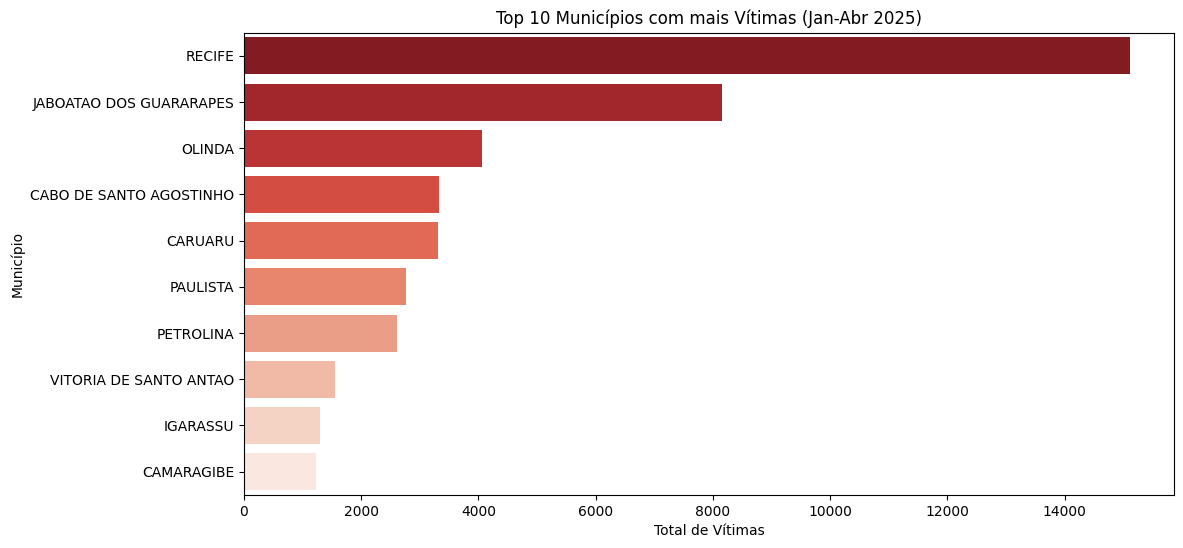

In [ ]:
vítimas_municipio = df.groupby('MUNICIPIO')['TOTAL DE VITIMAS'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=vítimas_municipio.values, y=vítimas_municipio.index, palette='Reds_r')
plt.title("Top 10 Municípios com mais Vítimas (Jan-Abr 2025)")
plt.xlabel("Total de Vítimas")
plt.ylabel("Município")
plt.show()


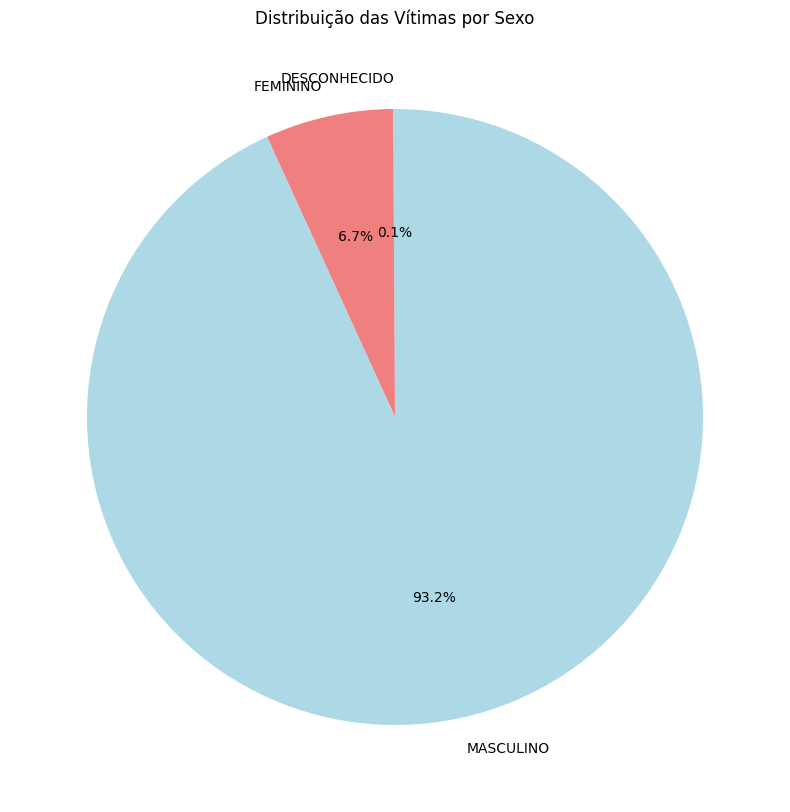

In [ ]:
sexo = df.groupby('SEXO')['TOTAL DE VITIMAS'].sum()

plt.figure(figsize=(10,10))
sexo.plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=90)
plt.title('Distribuição das Vítimas por Sexo')
plt.ylabel('')
plt.show()


In [ ]:
df['MES'] = df['DATA'].dt.month
df['MES'] = df['DATA'].dt.strftime('%B')
df['MES'] = df['MES'].replace({
    'January': 'Janeiro', 'February': 'Fevereiro', 'March': 'Março', 'April': 'Abril',
    'May': 'Maio', 'June': 'Junho', 'July': 'Julho', 'August': 'Agosto',
    'September': 'Setembro', 'October': 'Outubro', 'November': 'Novembro', 'December': 'Dezembro'
})
df

,MUNICIPIO,REGIAO_GEOGRAFICA,SEXO,NATUREZA JURIDICA,DATA,ANO,IDADE,TOTAL DE VITIMAS,MES
0,BEZERROS,AGRESTE,MASCULINO,HOMICIDIO,2004-01-01,2004,22,1,Janeiro
1,BEZERROS,AGRESTE,MASCULINO,HOMICIDIO,2004-01-01,2004,-1,1,Janeiro
2,BUENOS AIRES,ZONA DA MATA,MASCULINO,HOMICIDIO,2004-01-01,2004,43,1,Janeiro
3,CAMARAGIBE,REGIÃO METROPOLITANA,FEMININO,HOMICIDIO,2004-01-01,2004,54,1,Janeiro
4,CARUARU,AGRESTE,MASCULINO,HOMICIDIO,2004-01-01,2004,59,1,Janeiro
...,...,...,...,...,...,...,...,...,...
83484,CAMARAGIBE,REGIÃO METROPOLITANA,MASCULINO,HOMICIDIO,2025-04-30,2025,36,1,Abril
83485,ESCADA,ZONA DA MATA,MASCULINO,HOMICIDIO,2025-04-30,2025,20,1,Abril
83486,GRAVATA,AGRESTE,MASCULINO,HOMICIDIO,2025-04-30,2025,67,1,Abril
83487,JABOATAO DOS GUARARAPES,REGIÃO METROPOLITANA,MASCULINO,HOMICIDIO,2025-04-30,2025,34,1,Abril


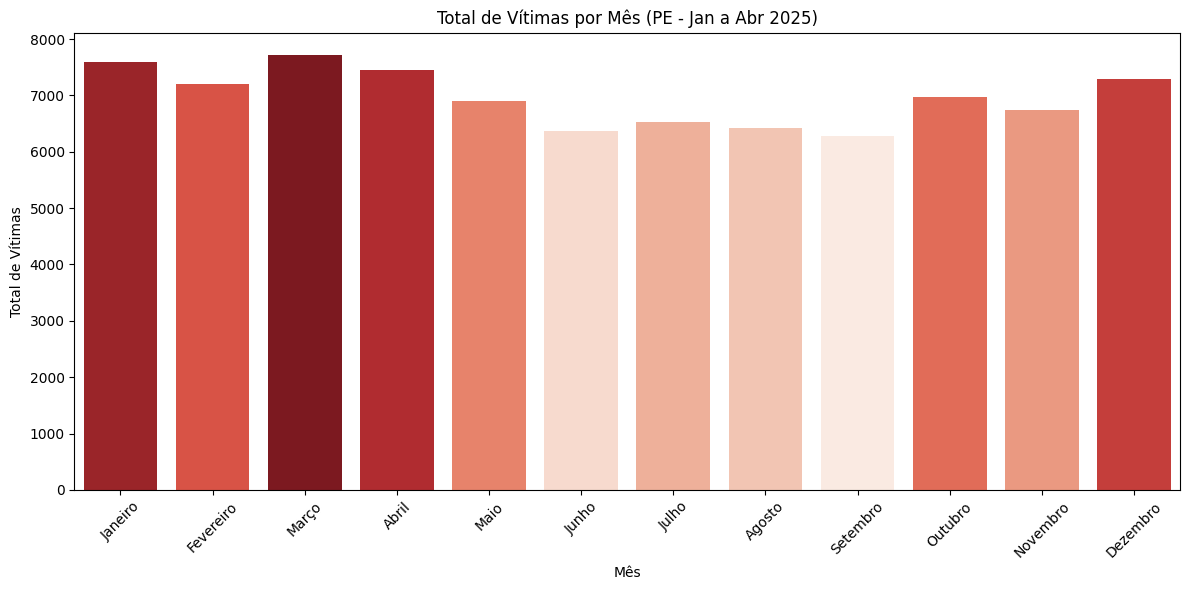

In [ ]:
# Agrupar por mês
vitimas_por_mes = df.groupby('MES')['TOTAL DE VITIMAS'].sum().reindex(
    ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']  # ordena corretamente os meses analisados
)

plt.figure(figsize=(12, 6))

# Gerar uma paleta de cores baseada nos valores
colors = sns.color_palette("Reds", len(vitimas_por_mes))
# Ordenar as cores conforme os valores (para maior impacto visual)
sorted_indices = vitimas_por_mes.values.argsort()
colors_ordered = [colors[i] for i in sorted_indices.argsort()]

# Criar o gráfico
sns.barplot(x=vitimas_por_mes.index, y=vitimas_por_mes.values, hue=vitimas_por_mes.index, palette=colors_ordered, legend=False)
plt.title('Total de Vítimas por Mês (PE - Jan a Abr 2025)')
plt.ylabel('Total de Vítimas')
plt.xlabel('Mês')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Exibir apenas os dados da região "SERTÃO"
df[df['REGIAO_GEOGRAFICA'] == 'SERTÃO']

,MUNICIPIO,REGIAO_GEOGRAFICA,SEXO,NATUREZA JURIDICA,DATA,ANO,IDADE,TOTAL DE VITIMAS,MES
19,SANTA MARIA DA BOA VISTA,SERTÃO,FEMININO,HOMICIDIO,2004-01-01,2004,25,1,Janeiro
20,SANTA MARIA DA BOA VISTA,SERTÃO,MASCULINO,HOMICIDIO,2004-01-01,2004,25,1,Janeiro
21,SANTA MARIA DA BOA VISTA,SERTÃO,MASCULINO,HOMICIDIO,2004-01-01,2004,32,1,Janeiro
22,SERTANIA,SERTÃO,MASCULINO,HOMICIDIO,2004-01-01,2004,37,1,Janeiro
42,PETROLINA,SERTÃO,MASCULINO,HOMICIDIO,2004-01-03,2004,52,1,Janeiro
...,...,...,...,...,...,...,...,...,...
83451,ARCOVERDE,SERTÃO,FEMININO,FEMINICIDIO,2025-04-26,2025,25,1,Abril
83456,IPUBI,SERTÃO,MASCULINO,HOMICIDIO,2025-04-26,2025,26,1,Abril
83463,TRINDADE,SERTÃO,MASCULINO,HOMICIDIO,2025-04-26,2025,29,1,Abril
83468,PETROLINA,SERTÃO,MASCULINO,HOMICIDIO,2025-04-27,2025,39,1,Abril


In [ ]:
df.drop('TOTAL DE VITIMAS', axis=1, inplace=True)
df

,MUNICIPIO,REGIAO_GEOGRAFICA,SEXO,NATUREZA JURIDICA,DATA,ANO,IDADE,MES
0,BEZERROS,AGRESTE,MASCULINO,HOMICIDIO,2004-01-01,2004,22,Janeiro
1,BEZERROS,AGRESTE,MASCULINO,HOMICIDIO,2004-01-01,2004,-1,Janeiro
2,BUENOS AIRES,ZONA DA MATA,MASCULINO,HOMICIDIO,2004-01-01,2004,43,Janeiro
3,CAMARAGIBE,REGIÃO METROPOLITANA,FEMININO,HOMICIDIO,2004-01-01,2004,54,Janeiro
4,CARUARU,AGRESTE,MASCULINO,HOMICIDIO,2004-01-01,2004,59,Janeiro
...,...,...,...,...,...,...,...,...
83484,CAMARAGIBE,REGIÃO METROPOLITANA,MASCULINO,HOMICIDIO,2025-04-30,2025,36,Abril
83485,ESCADA,ZONA DA MATA,MASCULINO,HOMICIDIO,2025-04-30,2025,20,Abril
83486,GRAVATA,AGRESTE,MASCULINO,HOMICIDIO,2025-04-30,2025,67,Abril
83487,JABOATAO DOS GUARARAPES,REGIÃO METROPOLITANA,MASCULINO,HOMICIDIO,2025-04-30,2025,34,Abril


In [ ]:
# Salvar o DataFrame limpo como arquivo CSV
df.to_csv('dados_limpos.csv', index=False, encoding='utf-8-sig')

# Baixar o arquivo
from google.colab import files
files.download('dados_limpos.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>